In [1]:
import datetime as dt
import re
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`


In [2]:
imptrade = pd.read_excel('tradequartelydata.xlsx', skiprows = 2)
imptrade

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Seasonally adjusted,TOTAL,Imports,100780.7,108258.6,111117.2,115172.8,118755.5,125171.5,124217.8,...,153379.3,156774.9,157952.0,168891.8,156357.6,159367.4,161654.7,162107.0,164108.7,160200.6
1,NaN,NaN,Exports,118030.5,120214.0,125137.3,128342.0,131753.4,133784.8,133818.4,...,167193.0,169750.9,167581.7,168983.5,172967.3,177985.3,178046.6,183961.5,186049.6,186672.9


In [3]:
drops = ['Unnamed: 0', 'Unnamed: 1']
imptrade.drop(drops, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
imptrade.rename(columns = {'Unnamed: 2':'Flow'}, inplace=True)
imptrade.loc[imptrade.Flow == 'Imports', 'Flow'] = 'Goods imports'
imptrade.loc[imptrade.Flow == 'Exports', 'Flow'] = 'Goods exports'
imptrade

,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Goods imports,100780.7,108258.6,111117.2,115172.8,118755.5,125171.5,124217.8,131485.8,132655.7,...,153379.3,156774.9,157952.0,168891.8,156357.6,159367.4,161654.7,162107.0,164108.7,160200.6
1,Goods exports,118030.5,120214.0,125137.3,128342.0,131753.4,133784.8,133818.4,140279.9,136893.3,...,167193.0,169750.9,167581.7,168983.5,172967.3,177985.3,178046.6,183961.5,186049.6,186672.9


In [4]:
impserv = pd.read_excel('servicegoodstot.xlsx', skiprows = 2)
impserv

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Seasonally adjusted,SERVICES,Imports,53873,55723,58403,62834,63327,68350,71284,...,103696,106392,108619,113702,112731,114222,112849,117888,118426,125688
1,NaN,NaN,Exports,62445,65853,65887,69132,72395,77983,79840,...,114083,115393,121062,122581,124441,126171,118948,123974,126357,128466


In [5]:
drops = ['Unnamed: 0', 'Unnamed: 1']
impserv.drop(drops, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
impserv.rename(columns = {'Unnamed: 2':'Flow'}, inplace=True)
impserv

,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Imports,53873,55723,58403,62834,63327,68350,71284,76583,75128,...,103696,106392,108619,113702,112731,114222,112849,117888,118426,125688
1,Exports,62445,65853,65887,69132,72395,77983,79840,84795,82724,...,114083,115393,121062,122581,124441,126171,118948,123974,126357,128466


In [6]:
impserv.loc[impserv.Flow == 'Imports', 'Flow'] = 'Services imports'
impserv.loc[impserv.Flow == 'Exports', 'Flow'] = 'Services exports'
impserv

,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Services imports,53873,55723,58403,62834,63327,68350,71284,76583,75128,...,103696,106392,108619,113702,112731,114222,112849,117888,118426,125688
1,Services exports,62445,65853,65887,69132,72395,77983,79840,84795,82724,...,114083,115393,121062,122581,124441,126171,118948,123974,126357,128466


In [7]:
inter_trade = pd.concat([imptrade,impserv], axis=0, ignore_index=True)              
inter_trade


,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Goods imports,100780.7,108258.6,111117.2,115172.8,118755.5,125171.5,124217.8,131485.8,132655.7,...,153379.3,156774.9,157952.0,168891.8,156357.6,159367.4,161654.7,162107.0,164108.7,160200.6
1,Goods exports,118030.5,120214.0,125137.3,128342.0,131753.4,133784.8,133818.4,140279.9,136893.3,...,167193.0,169750.9,167581.7,168983.5,172967.3,177985.3,178046.6,183961.5,186049.6,186672.9
2,Services imports,53873.0,55723.0,58403.0,62834.0,63327.0,68350.0,71284.0,76583.0,75128.0,...,103696.0,106392.0,108619.0,113702.0,112731.0,114222.0,112849.0,117888.0,118426.0,125688.0
3,Services exports,62445.0,65853.0,65887.0,69132.0,72395.0,77983.0,79840.0,84795.0,82724.0,...,114083.0,115393.0,121062.0,122581.0,124441.0,126171.0,118948.0,123974.0,126357.0,128466.0


In [8]:
int_tran = inter_trade.set_index('Flow').T
int_tran.index = pd.to_datetime(int_tran.index)
del int_tran.index.name
int_tran




Flow,Goods imports,Goods exports,Services imports,Services exports
2005-01-01,100780.7,118030.5,53873.0,62445.0
2005-04-01,108258.6,120214.0,55723.0,65853.0
2005-07-01,111117.2,125137.3,58403.0,65887.0
2005-10-01,115172.8,128342.0,62834.0,69132.0
2006-01-01,118755.5,131753.4,63327.0,72395.0
2006-04-01,125171.5,133784.8,68350.0,77983.0
2006-07-01,124217.8,133818.4,71284.0,79840.0
2006-10-01,131485.8,140279.9,76583.0,84795.0
2007-01-01,132655.7,136893.3,75128.0,82724.0
2007-04-01,131990.6,136641.1,76456.0,82938.0


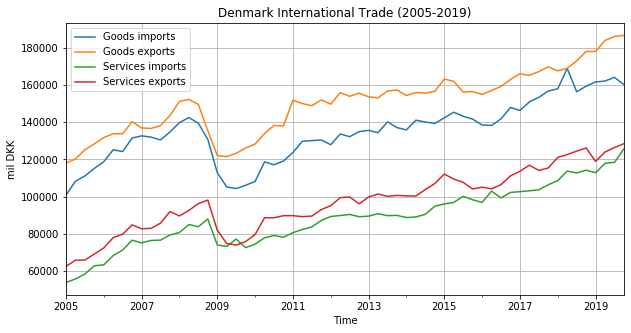

In [9]:
fig1 = int_tran.plot(figsize=(10,5))
plt.title('Denmark International Trade (2005-2019)')
plt.xlabel('Time')
plt.ylabel('mil DKK')
plt.legend(['Goods imports', 'Goods exports', 'Services imports', 'Services exports'], loc=2)
plt.grid(True)
plt.show()

As we can notice from the figure above Denmark has a bigger exchange of goods with respect to services. During the last 15 years for both goods and services the trend has been positive. The only oddity is represented by the year 2009 where both imports and exports have suffered a drastic collapse evidently due to the great global recession. From the graph we can also deduct that net balance for Denmark has been positive for the last 15 years with an overall better result for the commercial goods trade.

In [10]:
tr_par = pd.read_excel('tradecountries.xlsx', skiprows = [0,1,3,14])
to_drop = ['Unnamed: 0']
tr_par.drop(to_drop, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
tr_par.rename(columns = {'Unnamed: 1':'impexp','Unnamed: 2':'Country'}, inplace=True)
d = {'Imports (excl. vessels and aircraft, fuels etc.)':'Imports','Exports (excl. vessels and aircraft, fuels etc.)':'Exports'}
tr_par1 = tr_par.replace(d)
tr_par1

,impexp,Country,1997M01,1997M02,1997M03,1997M04,1997M05,1997M06,1997M07,1997M08,...,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01
0,Imports,EU,17214.4,16834.3,16989.7,17155.1,16641.8,17262.4,17205.8,17707.8,...,36307.3,36484.7,37554.4,37104.8,37195.5,36842.8,35793.9,36117.2,35871.7,36163.8
1,Imports,Germany,5231.7,5201.5,5597.4,5092.6,4840.2,5236.6,5229.9,5300.2,...,11226.8,11543.7,11592.0,11882.0,12191.4,11189.6,10982.0,10869.6,10671.6,10911.8
2,Imports,Sweden,2846.6,2747.4,2718.1,2721.5,2765.5,2800.6,2756.7,2952.9,...,6052.5,5939.3,6052.0,6157.2,6038.1,6131.2,5956.7,5897.6,5967.3,5921.8
3,Imports,United Kingdom,1681.3,1699.0,1723.5,1817.2,1757.9,1780.6,1696.8,1749.0,...,1755.3,1759.4,1872.1,1849.9,1745.1,1816.3,1920.6,1856.7,1783.2,1808.6
4,Imports,Netherlands,1721.5,1686.6,1741.6,1839.2,1823.0,1922.4,1913.0,1944.5,...,4060.3,4163.8,4029.8,4052.2,4144.3,4208.6,4061.8,4139.7,4022.0,3960.2
5,Imports,France,1281.2,1213.3,1171.4,1202.5,1238.8,1340.5,1397.4,1297.1,...,1650.9,1690.4,1724.3,1716.5,1713.3,1643.1,1610.2,1599.5,1616.1,1576.7
6,Imports,World outside EU,5355.5,5201.2,5211.6,5597.4,5343.8,5199.0,5402.7,5419.2,...,12591.5,12988.9,12808.3,13395.9,12571.8,12826.4,13169.3,12804.7,11382.3,13320.4
7,Imports,Norway,786.9,726.5,736.6,762.7,734.5,724.8,784.2,727.6,...,1344.8,1390.8,1329.3,1394.9,1406.2,1563.5,1429.6,1335.4,1372.9,1486.0
8,Imports,USA,1160.4,1117.3,988.5,1193.7,1095.2,989.2,1106.6,1073.4,...,1355.6,1734.3,1256.4,1469.5,1442.9,1335.5,1558.5,1358.6,1039.9,1650.7
9,Imports,China,420.9,415.9,473.1,511.8,516.4,487.7,495.1,547.0,...,3935.4,4021.0,4011.1,3975.9,3730.0,3821.7,3981.6,3474.5,3682.5,3805.9


In [11]:
tr_par2 = tr_par1.loc[tr_par1['impexp'] == 'Exports']
tr_par3 = tr_par2.copy()
to_drp = ['impexp']
tr_par3.drop(to_drp, axis=1, inplace=True)
tr_par3

,Country,1997M01,1997M02,1997M03,1997M04,1997M05,1997M06,1997M07,1997M08,1997M09,...,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01
10,EU,16544.3,16713.8,17028.7,17283.9,17360.7,17456.9,16852.7,17191.2,17241.5,...,32663.0,33059.1,32904.2,33269.3,34457.5,32406.4,32274.1,33473.2,31627.7,33627.9
11,Germany,5483.6,5519.0,5429.6,5625.5,5454.6,5567.3,5417.6,5367.5,5356.0,...,9103.5,8899.9,9034.0,8683.6,9269.8,8402.2,7807.6,8028.3,7872.5,8443.6
12,Sweden,2531.0,2439.4,2554.8,2566.2,2542.9,2629.0,2516.3,2640.1,2604.3,...,5402.9,5304.3,5475.5,5444.4,5541.8,5388.7,5211.2,5283.6,5218.7,5501.0
13,United Kingdom,2054.4,2109.0,2125.7,2217.3,2260.3,2302.0,2242.3,2303.9,2373.2,...,3229.6,3105.7,3467.1,3406.9,3549.8,3105.0,3280.6,3649.7,3699.8,3084.6
14,Netherlands,1031.4,1047.5,1045.2,1130.2,1114.3,1075.9,1112.9,1126.7,1121.2,...,2568.3,2398.0,2830.2,2517.5,3172.2,2575.9,2738.5,2779.2,2437.5,3723.1
15,France,1354.4,1303.7,1399.5,1376.7,1580.8,1334.4,1388.5,1363.4,1358.5,...,2099.3,2071.0,2191.4,2092.9,2175.2,2268.3,2173.0,2215.9,2191.6,2281.5
16,World outside EU,7579.2,7885.2,8220.5,7936.4,7791.6,8127.2,7977.4,8227.8,8145.8,...,24011.4,26434.2,24733.9,25936.8,26391.4,26534.0,27104.3,26178.0,26108.9,27156.8
17,Norway,1460.7,1521.5,1683.5,1463.8,1543.9,1527.9,1589.3,1505.5,1582.5,...,3667.7,3917.4,3634.4,4115.8,3846.3,3577.3,3562.8,3269.3,3585.1,3763.7
18,USA,1061.3,1055.4,1093.8,1030.7,1108.5,1095.7,1054.3,1209.7,1132.1,...,5271.3,7299.6,6058.2,5876.2,7557.2,6693.0,7715.0,7391.2,6775.0,6514.1
19,China,126.0,93.2,210.2,203.2,228.5,307.9,204.8,327.6,160.4,...,3284.2,2876.5,2249.9,2801.5,2985.2,3472.1,3347.4,3636.7,3764.2,3460.7


In [12]:
tr_par3.set_index('Country',inplace=True)
tr_par3.index.name = None
tr_par4 = tr_par3.transpose()
tr_par4.index.name = 'Date'
tr = tr_par4.iloc[96:]
tr.reset_index(inplace=True)
tr1 = tr.drop(tr.index[180])
tr1

,Date,EU,Germany,Sweden,United Kingdom,Netherlands,France,World outside EU,Norway,USA,China
0,2005M01,23241.9,6338.9,3777.7,2983.1,1403.9,1699.9,10847.8,1918.3,2067.8,475.2
1,2005M02,23605.5,6204.2,3800.2,3156.9,1482.4,1737.4,11560.1,2018.7,2615.6,586.7
2,2005M03,23217.2,6187.2,3739.2,3231.8,1391.5,1661.4,11518.2,2089.2,2176.7,496.4
3,2005M04,23645.9,6137.0,3867.7,3095.1,1411.9,1777.1,11056.1,2261.6,1912.5,484.6
4,2005M05,23531.2,6098.1,3901.3,3157.6,1428.5,1885.5,11791.9,2093.8,2724.9,564.4
...,...,...,...,...,...,...,...,...,...,...,...
175,2019M08,34457.5,9269.8,5541.8,3549.8,3172.2,2175.2,26391.4,3846.3,7557.2,2985.2
176,2019M09,32406.4,8402.2,5388.7,3105.0,2575.9,2268.3,26534.0,3577.3,6693.0,3472.1
177,2019M10,32274.1,7807.6,5211.2,3280.6,2738.5,2173.0,27104.3,3562.8,7715.0,3347.4
178,2019M11,33473.2,8028.3,5283.6,3649.7,2779.2,2215.9,26178.0,3269.3,7391.2,3636.7


In [13]:
tr2 = tr1.copy()
tr2['Other EU countries'] = tr2['EU'] - tr2.iloc[:,2:7].sum(axis=1)
tr2['Other non-EU countries'] = tr2['World outside EU'] - tr2.iloc[:,8:11].sum(axis=1)
drop = ['EU','World outside EU']
tr3 = tr2.drop(drop, axis=1, inplace=False)
tr3['Date'] =  pd.to_datetime(tr3['Date'], format='%YM%m')
tr3

,Date,Germany,Sweden,United Kingdom,Netherlands,France,Norway,USA,China,Other EU countries,Other non-EU countries
0,2005-01-01,6338.9,3777.7,2983.1,1403.9,1699.9,1918.3,2067.8,475.2,7038.4,6386.5
1,2005-02-01,6204.2,3800.2,3156.9,1482.4,1737.4,2018.7,2615.6,586.7,7224.4,6339.1
2,2005-03-01,6187.2,3739.2,3231.8,1391.5,1661.4,2089.2,2176.7,496.4,7006.1,6755.9
3,2005-04-01,6137.0,3867.7,3095.1,1411.9,1777.1,2261.6,1912.5,484.6,7357.1,6397.4
4,2005-05-01,6098.1,3901.3,3157.6,1428.5,1885.5,2093.8,2724.9,564.4,7060.2,6408.8
...,...,...,...,...,...,...,...,...,...,...,...
175,2019-08-01,9269.8,5541.8,3549.8,3172.2,2175.2,3846.3,7557.2,2985.2,10748.7,12002.7
176,2019-09-01,8402.2,5388.7,3105.0,2575.9,2268.3,3577.3,6693.0,3472.1,10666.3,12791.6
177,2019-10-01,7807.6,5211.2,3280.6,2738.5,2173.0,3562.8,7715.0,3347.4,11063.2,12479.1
178,2019-11-01,8028.3,5283.6,3649.7,2779.2,2215.9,3269.3,7391.2,3636.7,11516.5,11880.8


In [14]:
def convert_to_quarterly(df):
    """Aggregates 3 months of data to a quarterly value."""
    df.Date = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    oth_col = ['Germany','Sweden','United Kingdom','Netherlands','France','Norway','USA','China','Other EU countries','Other non-EU countries']
    i_col = [x for x in df.columns if x not in oth_col]
    df_up = df.resample("QS-JAN")[oth_col].sum()
    df_up.index = df_up.index
    df_up[i_col] = df[i_col]  
    return df_up

tr3 = convert_to_quarterly(tr3)
tr3

,Germany,Sweden,United Kingdom,Netherlands,France,Norway,USA,China,Other EU countries,Other non-EU countries
Date,,,,,,,,,,
2005-01-01,18730.3,11317.1,9371.8,4277.8,5098.7,6026.2,6860.1,1558.3,21268.9,19481.5
2005-04-01,18294.8,11730.2,9704.8,4213.0,5305.1,6289.5,7026.0,1559.4,21267.4,19322.7
2005-07-01,18633.7,11817.1,9512.5,4348.0,5146.0,6190.9,7878.8,1591.4,22686.3,20993.5
2005-10-01,19720.1,12331.6,10026.4,4563.1,5490.5,6640.0,7948.8,1753.3,23565.1,19914.3
2006-01-01,19906.9,12623.4,10251.8,4912.4,5736.0,6569.6,7165.3,1780.3,24533.4,19405.1
2006-04-01,20368.6,13066.1,9960.6,4989.9,5820.0,6990.1,8245.0,1577.4,24195.3,20881.9
2006-07-01,20310.0,13110.9,9766.1,4984.3,5867.0,6973.3,8160.3,1856.4,25954.5,20884.6
2006-10-01,21183.2,14153.7,9849.7,4989.4,6218.0,7019.5,8742.1,1912.8,26788.8,22451.2
2007-01-01,20767.0,14493.5,9581.0,5115.9,5501.9,7508.5,9990.0,2167.1,26772.1,21424.8


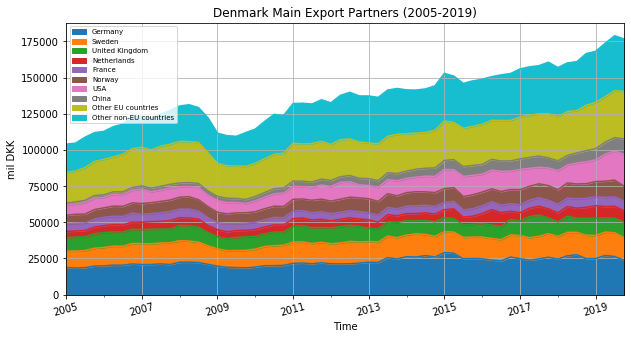

In [15]:
fig2 = tr3.plot(figsize=(10,5), kind='area', stacked=True, rot=15)
plt.title('Denmark Main Export Partners (2005-2019)')
plt.xlabel('Time')
plt.ylabel('mil DKK')
plt.legend(loc=2, prop={'size': 7})
plt.grid(True)
plt.show()

In [16]:
#LOAD
Dst = pydst.Dst(lang='en') # setup data loader with the language 'English'
Dst.get_subjects()
tables = Dst.get_tables(subjects=['13'])
tables

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,UHV1,Total external trade,m DKK,2020-03-10 08:00:00,1997M01,2020M01,True,"[imports and exports, seasonal adjustment, kin..."
1,UHV2,Total external trade,m DKK,2020-03-10 08:00:00,1997M01,2020M01,True,"[imports and exports, seasonal adjustment, cou..."
2,UHV3,Total external trade,m DKK,2020-03-10 08:00:00,1997M01,2020M01,True,"[imports and exports, kind, country, time]"
3,UHV4,Total external trade,m DKK,2020-03-10 08:00:00,1995M01,2020M01,True,"[imports and exports, main SITC groups, countr..."
4,UHV5,Total external trade,m DKK,2020-03-10 08:00:00,1988M01,2020M01,True,"[imports and exports, SHORT-TERM (industrial o..."
...,...,...,...,...,...,...,...,...
63,DNKAP,Denmarks international investment position,m DKK,2020-04-01 08:00:00,2005Q1,2019Q4,True,"[balance, item, domestic sector, currency, co..."
64,DNDIA,Yearly stock statistics on direct investments,DKK bn.,2019-10-14 08:00:00,2004,2018,True,"[type, principle, item, country, domestic econ..."
65,DNKAPK,Denmarks international investment position com...,DKK mio.,2020-04-01 08:00:00,2005Q1,2019Q4,True,"[balance, item, domestic sector, currency, co..."
66,DNUIC,Inward foreign direct investment,DKK bn.,2019-10-14 08:00:00,2015,2018,True,"[type, item, ultimate investor country, domest..."


In [17]:
tables[tables.id == 'UHV1']
ind_vars = Dst.get_variables(table_id='UHV1')
ind_vars

,id,text,elimination,time,values
0,INDUD,imports and exports,False,False,"[{'id': '1', 'text': 'Imports'}, {'id': '2', '..."
1,SÆSON,seasonal adjustment,False,False,"[{'id': 'EJSÆSON', 'text': 'Non-seasonally adj..."
2,ART,kind,True,False,"[{'id': 'TOT', 'text': 'TOTAL'}, {'id': 'TOTXS..."
3,Tid,time,False,True,"[{'id': '1997M01', 'text': '1997M01'}, {'id': ..."


In [18]:
tot = Dst.get_variables(table_id='UHV3')
for id in ['INDUD','ART','Tid']:
    print(id)
    values = tot.loc[tot.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')


INDUD
 id = 1, text = Imports
 id = 2, text = Exports
ART
 id = TOT, text = TOTAL
 id = TOTXSOFX3, text = TOTAL (excl. vessels, aircraft, fuels etc.)
 id = 0-4X2-3, text = Live animals, Food, Beverages And Tobacco
 id = 2, text = Crude Materials, Inedible, Except Fuels
 id = 5, text = Chemicals And Related Products
 id = 6, text = Manufactured Goods Classified Chiefly By Material
 id = 7X78-79, text = Machinery (excl. Transport Equipment)
 id = 78-79, text = Transport Equipment
 id = 8-9, text = Miscellaneous Manufactured Articles
 id = 3, text = Mineral Fuels, Lubricants And Related Materials
 id = SOGF, text = Vessels, aircraft etc.
Tid
 id = 1997M01, text = 1997M01
 id = 1997M02, text = 1997M02
 id = 1997M03, text = 1997M03
 id = 1997M04, text = 1997M04
 id = 1997M05, text = 1997M05
 id = 1997M06, text = 1997M06
 id = 1997M07, text = 1997M07
 id = 1997M08, text = 1997M08
 id = 1997M09, text = 1997M09
 id = 1997M10, text = 1997M10
 id = 1997M11, text = 1997M11
 id = 1997M12, text = 1

In [19]:
var = {'INDUD':['2'],'SÆSON':['SÆSON'],'ART':['*'],'Tid':['*']}
gdr= Dst.get_data(table_id = 'UHV1', variables=var)
gdr.head()

,INDUD,SÆSON,ART,TID,INDHOLD
0,Exports,Seasonally adjusted,"Vessels, aircraft etc.",2019M06,659.0
1,Exports,Seasonally adjusted,TOTAL,2019M06,61246.4
2,Exports,Seasonally adjusted,"TOTAL (excl. vessels, aircraft, fuels etc.)",2019M06,57638.1
3,Exports,Seasonally adjusted,"Live animals, Food, Beverages And Tobacco",2019M06,10531.4
4,Exports,Seasonally adjusted,"Crude Materials, Inedible, Except Fuels",2019M06,2124.4


In [20]:
gdr.rename(columns = {'INDUD':'ImpExp','ART':'Type of good','TID':'Date','INDHOLD':'Values'}, inplace=True)
to_drop = ['ImpExp','SÆSON']
gdr.drop(to_drop, inplace=True, axis=1)
gdr.drop(gdr.index[2])
gdr

,Type of good,Date,Values
0,"Vessels, aircraft etc.",2019M06,659.0
1,TOTAL,2019M06,61246.4
2,"TOTAL (excl. vessels, aircraft, fuels etc.)",2019M06,57638.1
3,"Live animals, Food, Beverages And Tobacco",2019M06,10531.4
4,"Crude Materials, Inedible, Except Fuels",2019M06,2124.4
...,...,...,...
3042,Chemicals And Related Products,2007M06,6306.8
3043,Manufactured Goods Classified Chiefly By Material,2007M06,5049.7
3044,Machinery (excl. Transport Equipment),2007M06,10737.5
3045,Transport Equipment,2007M06,1402.6
